# Принятие решений в бизнесе


**Описание проекта**

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

Файл /datasets/hypothesis.csv:

- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Файл /datasets/orders.csv:

- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.

Файл /datasets/visitors.csv:

- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста

## Просмотрим и оценим данные

In [1]:
#импортируем необходимые библиотеки 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import math
import numpy as np

In [2]:
#загрузим данные 
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

In [3]:
#оценим данные hypothesis
display(hypothesis, hypothesis.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


None

Выводы:

- 9 различных гипотез.
- В названиях столбцов заглавные буквы
- пропусков нет
- типы данных корректны

In [4]:
#оценим данные orders
display(orders, orders.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


None

Выводы:

- В названиях столбцов заглавные буквы
- некорреткный тип данных у столбца date
- пропусков нет

In [5]:
#оценим данные orders
display(visitors, visitors.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


None

Выводы:

- некорректный тип данных столбца date
- пропусков нет

## Предобработка данных

In [6]:
#переименуем столбцы в таблице hypothesis и orders
hypothesis.columns = hypothesis.columns.str.lower()
orders.columns = orders.columns.str.lower()

In [7]:
#приведём столбцы с датами к корректному типу данных 
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

In [8]:
#проверим на неочевидные дубликаты по группам А/В теста 
display(orders['group'].unique(),visitors['group'].unique())

array(['B', 'A'], dtype=object)

array(['A', 'B'], dtype=object)

In [9]:
#проверим данные orders на дубликаты
orders.duplicated().sum()

0

In [10]:
#проверим данные visitors на дубликаты
visitors.duplicated().sum()

0

In [11]:
#Посчитаем количество уникальных пользоваталей в A/B тесте
len(orders['visitorid'].unique())

1031

In [12]:
#Посчитаем количество уникальных пользоваталей по группе А
group_A = orders.query('group == "A"')
len(group_A['visitorid'].unique())

503

In [13]:
#Посчитаем количество уникальных пользоваталей по группе В
group_B = orders.query('group == "B"')
len(group_B['visitorid'].unique())

586

In [14]:
#найдем пользователей, которые присутствуют в обеих группах
general = group_A.merge(group_B,on = 'visitorid')
len(general['visitorid'].unique())

58

Вывод

В общей таблице у нас 1031 уникальных пользоваталей. Но при разделении на группы А и В 503 и 586 соответственно, что в сумме даёт 1089. То есть, есть 58 пользователей(1089-1031), которые попали в обе группы. Мы не знаем, в какую группу они должны были попасть, поэтому просто удалим этих пользователей из таблицы, чтобы осталось 973 уникальных пользователя.

In [15]:
orders = orders[~orders['visitorid'].isin(general['visitorid'])]
len(orders['visitorid'].unique())

973

**Вывод**

Предобработка данных завершена:
- переименовали столбцы в таблице hypothesis и orders
- привели столбцы с датой к верному типу данных
- посчитали уникальных пользователей в обеих группах и удалили дубликаты для более корректного и верного анализа

## Исследовательский анализ данных

### Часть 1. Приоритизация гипотез.

Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

In [16]:
hypothesis['ice'] = hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']

hypothesis.sort_values('ice', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ice
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.200000
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.333333
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.200000
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.000000
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.000000
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.000000
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.333333
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.125000
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.000000


Вывод:

Гипотезы 8, 0 и 7 лидируют по показателю ICE

Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

In [17]:
hypothesis['rice'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']

hypothesis.sort_values('rice', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ice,rice
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.200000,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.333333,40.0
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.200000,16.2
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.125000,9.0
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.000000,3.0


Вывод:

Гипотезы 7, 2 и 0 лидируют по показателю RICE

**Вывод**

Приоритизация гипотез при применении RICE вместо ICE изменилась из-за параметра reach, который учитывался при расчете RICE, но не учитывался при расчете ICE. У гипотезы 7 и 2 этот параметр имеет оценки 10 и 8 соответственно,а гипотеза 8 снизилась на пятое место, потому что у неё reach равен 1.

### Часть 2. Анализ A/B-теста

Подготовим таблицу для анализа результатов A/B теста

In [18]:
orders_group = (orders.groupby(['date','group'], as_index=False)
                        .agg({'transactionid':'nunique','visitorid':'nunique','revenue':'sum'}))\
                        .rename(columns={'transactionid':'orders','visitorid':'buyers'})
orders_group['group_copy'] = orders_group['group']
orders_group = orders_group.set_index(['date','group'])
orders_cumsum = orders_group.sort_values(['date','group']).groupby('group_copy').cumsum().reset_index()

orders_group

orders  buyers  revenue group_copy
date       group                                    
2019-08-01 A          23      19   142779          A
           B          17      17    59758          B
2019-08-02 A          19      18    91602          A
           B          23      22   162043          B
2019-08-03 A          24      24   112473          A
...                  ...     ...      ...        ...
2019-08-29 B          15      15   106100          B
2019-08-30 A           9       8    78180          A
           B          21      21   209223          B
2019-08-31 A           8       8    53243          A
           B          17      17   113139          B

[62 rows x 4 columns]

In [19]:
# посчитаем сумму визитов по дням в каждой группе
visitors_cumsum = visitors.groupby(['date','group'], as_index=False).agg({'visitors':'sum'}).sort_values(['date','group'])

# скопируем group чтобы провести по ней кумулятивную сумму
visitors_cumsum['group_copy'] = visitors_cumsum['group']
visitors_cumsum = visitors_cumsum.set_index(['date','group']).groupby('group_copy').cumsum().reset_index()  

In [20]:
cumulative = orders_cumsum.join(visitors_cumsum[['visitors']])

In [21]:
#считаем средний чек и конверсию 
cumulative['average_check'] = cumulative['revenue'] / cumulative['orders']
cumulative['conversion'] = cumulative['orders'] / cumulative['visitors']

In [22]:
cumulative.head()

,date,group,orders,buyers,revenue,visitors,average_check,conversion
0,2019-08-01,A,23,19,142779,719,6207.782609,0.031989
1,2019-08-01,B,17,17,59758,713,3515.176471,0.023843
2,2019-08-02,A,42,37,234381,1338,5580.500000,0.031390
3,2019-08-02,B,40,39,221801,1294,5545.025000,0.030912
4,2019-08-03,A,66,61,346854,1845,5255.363636,0.035772


Вывод:
- Посчитали кумулятивные данные по группам и дням
- Посчитали средний чек и конверсию

### 1. Построим график кумулятивной выручки по группам.

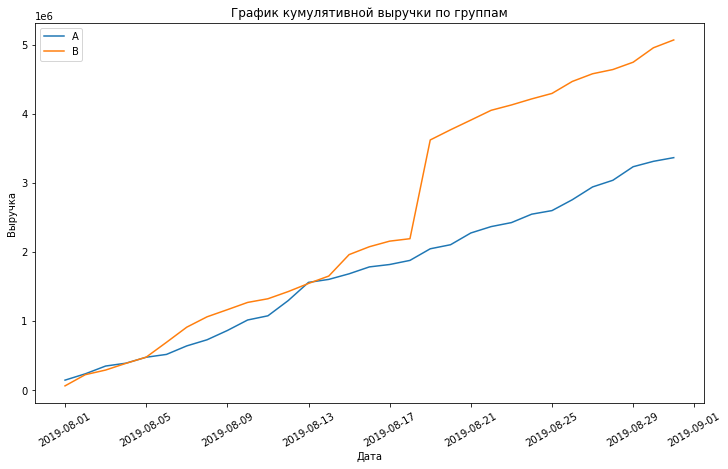

In [23]:
cumulativeA = cumulative[cumulative['group']=='A'][['date', 'revenue']]
cumulativeB = cumulative[cumulative['group']=='B'][['date', 'revenue']]

plt.figure(figsize=(12, 7))
plt.plot(cumulativeA.iloc[:,0].to_frame(), cumulativeA.iloc[:,1].to_frame(), label='A' )
plt.plot(cumulativeB.iloc[:,0].to_frame(), cumulativeB.iloc[:,1].to_frame(), label='B')
plt.ylabel('Выручка')
plt.xlabel('Дата')
plt.title('График кумулятивной выручки по группам')
plt.xticks(rotation=30)
plt.legend()
plt.show()

**Выводы:**
- У группы B наблюдается скачок по выручке 18го августа, этот скачок обусловлен крупной выручкой в этот день
- Графики растут равномерно, не учитывая скачок группы В

### 2. Построим график кумулятивного среднего чека по группам.

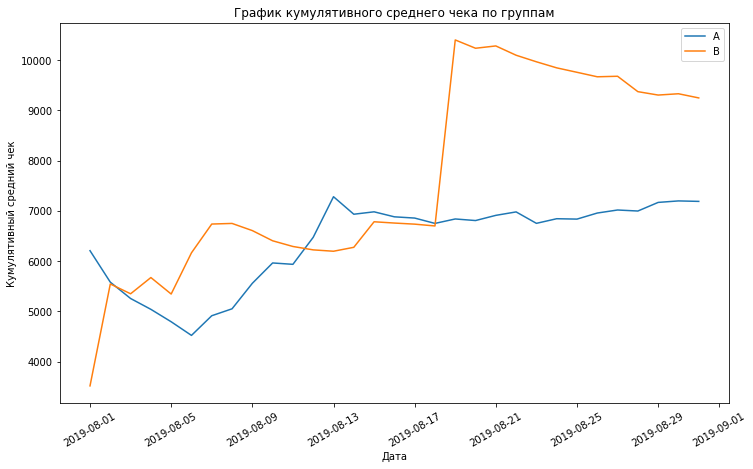

In [24]:
cumulativeA = cumulative[cumulative['group']=='A'][['date', 'average_check']]
cumulativeB = cumulative[cumulative['group']=='B'][['date', 'average_check']]

plt.figure(figsize=(12, 7))
plt.plot(cumulativeA.iloc[:,0].to_frame(), cumulativeA.iloc[:,1].to_frame(), label='A' )
plt.plot(cumulativeB.iloc[:,0].to_frame(), cumulativeB.iloc[:,1].to_frame(), label='B')
plt.ylabel('Кумулятивный cредний чек')
plt.xlabel('Дата')
plt.title('График кумулятивного среднего чека по группам')
plt.xticks(rotation=30)
plt.legend()
plt.show()

**Вывод**
- У группы В наблюдается скачок по кумулятивному среднему чеку также 18го августа и ещё 1го августа.
- У группы А наблюдается снижение с 1го по 6ое августа.
- Наблюдается общая тенденция роста

### 3. Построим график относительного изменения кумулятивного среднего чека группы B к группе A.

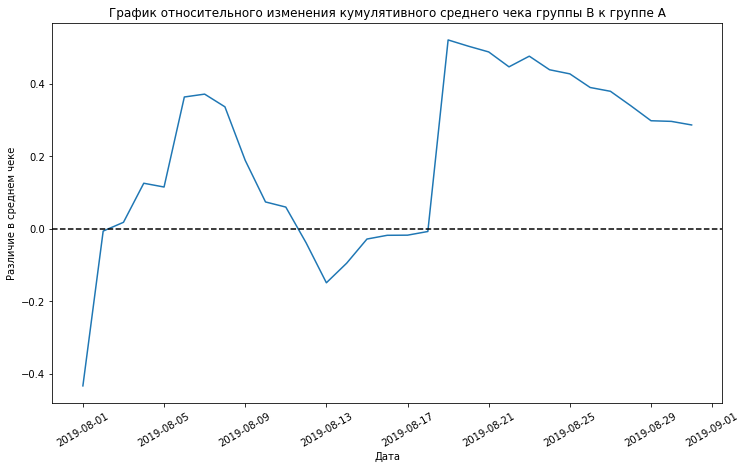

In [25]:
change = (cumulativeA[['date', 'average_check']].merge(cumulativeB[['date', 'average_check']], 
                                            left_on='date', right_on='date', how='left', suffixes=['_A', '_B']))

plt.figure(figsize=(12, 7))
plt.plot(change['date'], change['average_check_B'] / change['average_check_A']-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.ylabel('Различие в среднем чеке')
plt.xlabel('Дата')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xticks(rotation=30)
plt.show()

**Вывод**
- Средний чек по группе B выше, чем по группе A

### 4. Построим график кумулятивного среднего количества заказов на посетителя по группам.

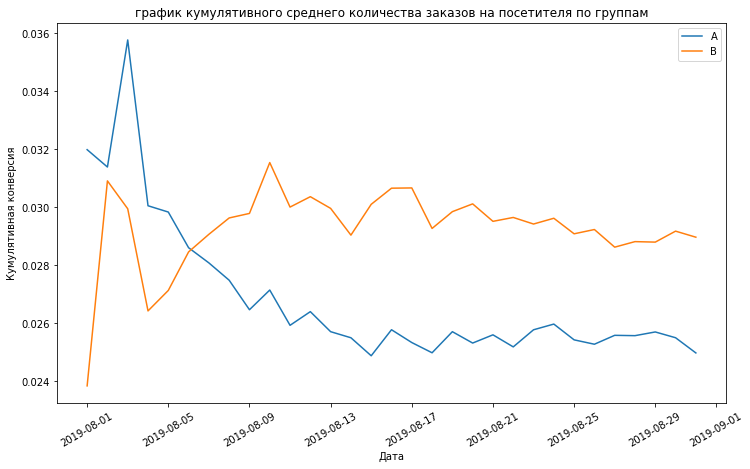

In [26]:
cumulativeA = cumulative[cumulative['group']=='A']
cumulativeB = cumulative[cumulative['group']=='B']

plt.figure(figsize=(12, 7))
plt.plot(cumulativeA['date'], cumulativeA['conversion'], label='A')
plt.plot(cumulativeB['date'], cumulativeB['conversion'], label='B')
plt.ylabel('Кумулятивная конверсия')
plt.xlabel('Дата')
plt.title('график кумулятивного среднего количества заказов на посетителя по группам')
plt.xticks(rotation=30)
plt.legend()
plt.show();

**Вывод**
- Конверсия группы B вырвалась вперёд 6го августа и зафиксировалась, а конверсия группы A просела и также зафиксировалась.

### 5. Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.

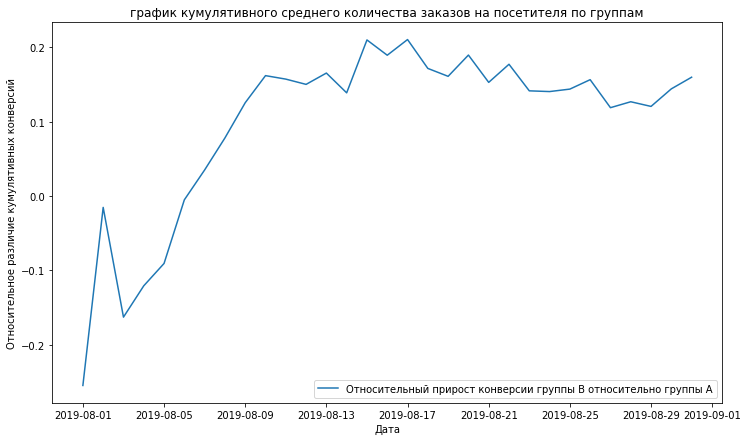

In [27]:
cumulativeA = cumulative[cumulative['group'] == 'A']
cumulativeB = cumulative[cumulative['group'] == 'B']

mergedCumulativeConversions = cumulativeA[['date','conversion']].merge(cumulativeB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(12, 7))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.ylabel('Относительное различие кумулятивных конверсий')
plt.xlabel('Дата')
plt.title('график кумулятивного среднего количества заказов на посетителя по группам')
plt.legend();

**Вывод**
- В начале теста группа B просела относительно группы A, затем резко выросла и стабилизировалась.

### 6. Постройте точечный график количества заказов по пользователям.

In [28]:
ordersByUsers = orders.groupby('visitorid', as_index=False).agg({'transactionid' : pd.Series.nunique})
ordersByUsers.columns = ['visitorid','orders']
ordersByUsers.head()

,visitorid,orders
0,5114589,1
1,6958315,1
2,11685486,1
3,39475350,1
4,47206413,1


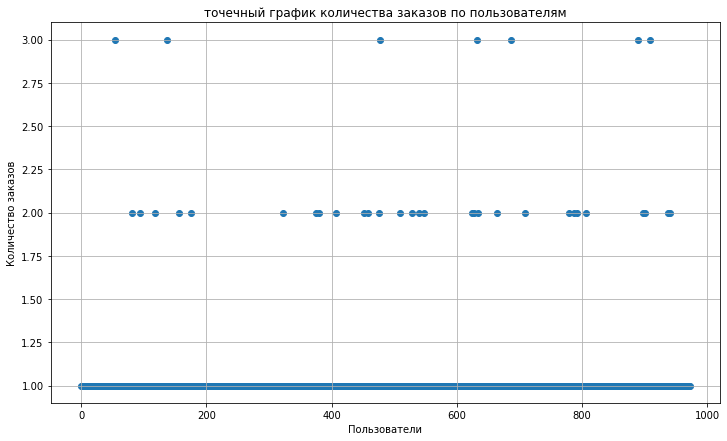

In [29]:
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.figure(figsize=(12, 7))
plt.grid(True)
plt.title('точечный график количества заказов по пользователям')
ax = plt.gca()
ax.set_xlabel('Пользователи')
ax.set_ylabel('Количество заказов')
plt.scatter(x_values, ordersByUsers['orders'])
plt.show()

**Вывод** 
- Большинство покупателей заказывали только один раз. Однако есть пользователи с 2-3 заказами.

### 7. Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.

In [30]:
print('95 перцентиль: %.2f' % (np.percentile(ordersByUsers['orders'], [95])))
print('99 перцентиль: %.2f' % (np.percentile(ordersByUsers['orders'], [99])))

95 перцентиль: 1.00
99 перцентиль: 2.00


**Вывод** 
- Не более 5% пользователей оформляли больше 1 заказа. И 1% пользователей заказывал более 2 раз. Можем обозначить 2 заказа за гарницу для определния аномальных пользователей.

### 8. Построим точечный график стоимостей заказов.

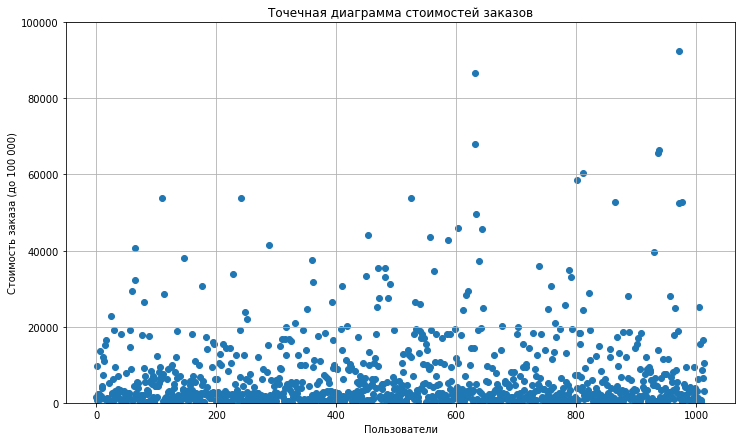

In [31]:
x_values = pd.Series(range(0, len(orders['revenue'])))

plt.figure(figsize=(12, 7))
plt.grid(True)
plt.title('Точечная диаграмма стоимостей заказов')
ax = plt.gca()
ax.set_xlabel('Пользователи')
ax.set_ylabel('Стоимость заказа (до 100 000)')
plt.ylim(0, 100000)
plt.scatter(x_values, orders['revenue']);

**Вывод** 
- Большинство заказов не превышает 20 000, но есть выбросы и в 80 000 - 100 000.

### 9. Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.

In [32]:
print('95 перцентиль: %.2f' % (np.percentile(orders['revenue'], [95])))
print('99 перцентиль: %.2f' % (np.percentile(orders['revenue'], [99])))

95 перцентиль: 26785.00
99 перцентиль: 53904.00


**Вывод** 
- Не более 5% заказов дороже 26 785 рублей. И только 1% заказов дороже 53 904 рублей. Выберем 53 904 за границу для определения аномальных заказов.

### 10. Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.

In [33]:
#Подготовим данные
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']]. \
                                            agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']]. \
                                            agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']


ordersADaily = orders[orders['group']=='A'][['date', 'transactionid', 'visitorid', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionid' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: \
        ordersADaily[ordersADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

ordersBDaily = orders[orders['group']=='B'][['date', 'transactionid', 'visitorid', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionid' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: \
        ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')

**Сформулируем гипотезы.**

- Нулевая: Cтатистически значимых различий в среднем количестве заказов на посетителя между группами нет.
- Альтернативная: различия в среднем количестве заказов на посетителя между группами есть.

In [34]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorid', as_index=False).agg({'transactionid' : pd.Series.nunique})
ordersByUsersA.columns = ['userid', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorid', as_index=False).agg({'transactionid' : pd.Series.nunique})
ordersByUsersB.columns = ['userid', 'orders']

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

alpha = 0.05
results=st.mannwhitneyu(sampleA, sampleB)
print('p-значение: {:.3f}'.format(results.pvalue))
if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу: "Cтатистически значимых различий в среднем количестве заказов на посетителя между группами есть".')
else:
    print('Не получилось отвергнуть нулевую гипотезу: "Cтатистически значимых различий в среднем количестве заказов на посетителя между группами нет".')

print("Относительный прирост конверсии группы B: {0:.3f}".format(sampleB.mean()/sampleA.mean()-1))

p-значение: 0.011
Отвергаем нулевую гипотезу: "Cтатистически значимых различий в среднем количестве заказов на посетителя между группами есть".
Относительный прирост конверсии группы B: 0.160


**Вывод**

Показатель p-value = 0.011, что меньше 0.05. Нулевую гипотезу о том, что статистически значимых различий между группами нет - отвергаем. Значит по «сырым» данным различия групп A и B есть. Относительный прирост группы "B" над "A" равен 16%.

### 11. Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.

**Сформулируем гипотезы.**

- Нулевая: вывод о различии сделать нельзя.
- Альтернативная: разница статистически значима.

In [35]:
results = st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])

print('p-значение: ', "{0:.3f}".format(results.pvalue))

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу: разница статистически значима")
else:
    print("Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя")

print("{0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-значение:  0.829
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя
0.287


**Вывод**

Показатель р-value=0.829, что больше 0.05. Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя. Можно отметить, что различие в 28,7% не является статистически значимым.

### 12. Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.

**Сформулируем гипотезы.**

- Нулевая: статистически значимых различий в конверсии между группами нет
- Альтернативная: разница статистически значима

In [36]:
users_ManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['userid'], ordersByUsersB[ordersByUsersB['orders'] > 2]['userid']], axis = 0)
users_ExpensiveOrders = orders[orders['revenue'] > 58233]['visitorid']
abnormalUsers = pd.concat([users_ManyOrders, users_ExpensiveOrders], axis = 0).drop_duplicates().sort_values()
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userid'].isin(abnormalUsers))]['orders'], \
                             pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), \
                                       name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userid'].isin(abnormalUsers))]['orders'], \
                             pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), \
                                       name='orders')],axis=0)
results = st.mannwhitneyu(sampleAFiltered, sampleBFiltered)

print('p-значение: ', "{0:.3f}".format(results.pvalue))

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу: разница статистически значима")
else:
    print("Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя")

print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p-значение:  0.007
Отвергаем нулевую гипотезу: разница статистически значима
0.189


**Вывод**

Показатель p-value = 0.007, что меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет - отвергаем. А относительный выигрыш группы "B" над "A" равен 18,9%.

### 13. Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.

In [37]:
print('Относительное изменение среднего чека в группе B по отношению группы A после очистки данных: {:.3f}'.format(
orders[np.logical_and(orders['group']=='B', np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue'].mean()\
/orders[np.logical_and(orders['group']=='A', np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue'].mean()-1))
       
       
results = st.mannwhitneyu(orders[np.logical_and(orders['group']=='A', np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue'],
                             orders[np.logical_and(orders['group']=='B', np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue'])
print('P-value: {}'.format(results.pvalue))

Относительное изменение среднего чека в группе B по отношению группы A после очистки данных: -0.032
P-value: 0.7877044862440841


**Вывод**

- p-value уменьшился, но по прежнему значительно выше 0,05
- Особенно нужно обратить внимание на разницу между средним чеком. Она упала с 28,7% в пользу B до 3% в пользу A! Это еще раз заставляет убедиться, что статистически значимых различий по этой метрике между группами нет.


## Общий Вывод

Варианты решений:

- Остановить тест, зафиксировать победу одной из групп.
- Остановить тест, зафиксировать отсутствие различий между группами.
- Продолжить тест.

По данным различия в конверсии групп A и B есть. Относительный выигрыш группы "B" над "A" равен 18,9% по "очищенным" и 16% по "сырым" данным.

Оказалось, что и по "сырым" и по "очищенным" данным различия в средних чеках групп A и B отстутствуют, несмотря на то, что средний чек группы B оказался незначительно ниже среднего чека группы A по "очищенным" данным, в то время как по "сырым" данным, он был больше на 28,7%.

В итоге **можно принять решение остановить тестирование** и констатировать победу группы B : группа B значительно лучше (эффективнее) группы A по конверсии, хотя по среднему чеку группы примерно равны.